# **Dog Vision**

## **Making our workspace ready**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* importing libraries

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
tf.__version__

'2.7.0'

In [ ]:
hub.__version__

'0.12.0'

In [ ]:
print("GPU avilable" if tf.config.list_physical_devices("GPU") else "NO")


GPU avilable


## **Make our Data ready**

In [ ]:
import pandas as pd

In [ ]:
label_csv=pd.read_csv("/content/drive/MyDrive/Dog Vision/data/labels.csv")
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,6c38ebf47534fcba5593729ce9036b91,scottish_deerhound
freq,1,126


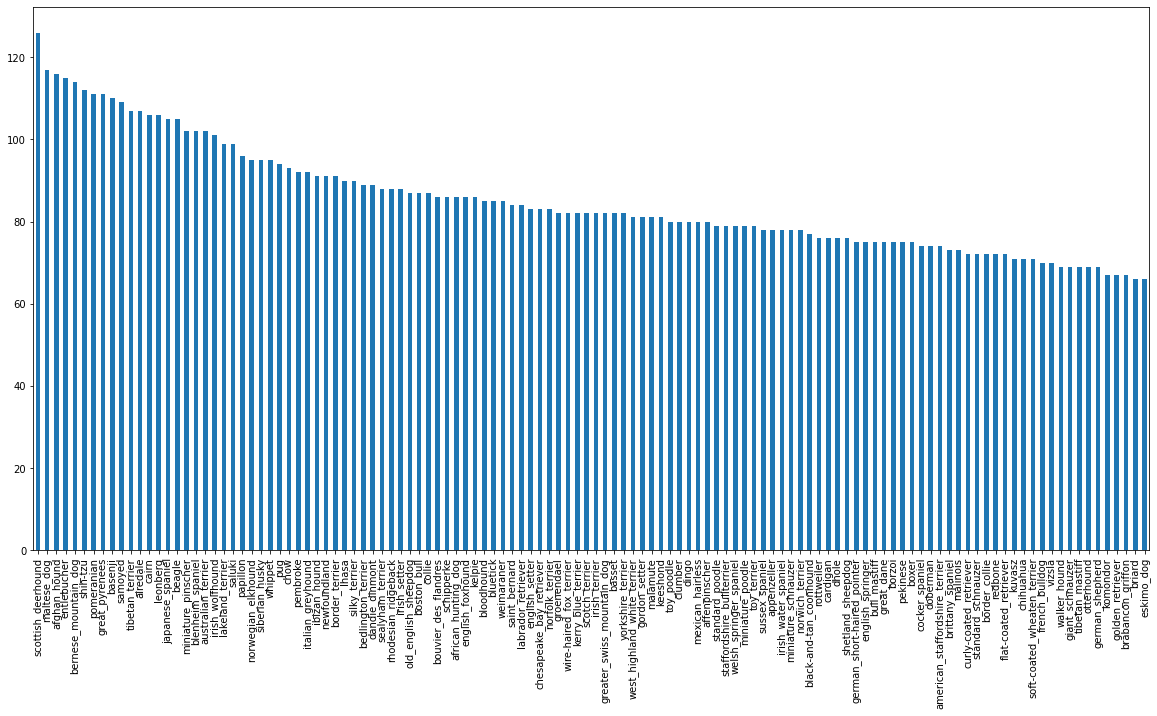

In [ ]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

* getting our images

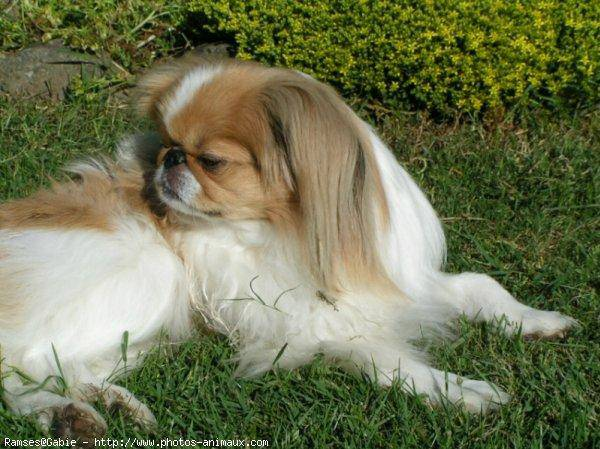

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Dog Vision/data/test/000621fb3cbb32d8935728e48679680e.jpg')

* making paths for images

In [ ]:
filenames=['/content/drive/MyDrive/Dog Vision/data/train/'+fname+'.jpg' for fname in label_csv['id']]
filenames[:10]

['/content/drive/MyDrive/Dog Vision/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

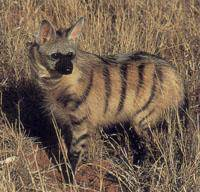

In [ ]:
Image(filenames[15])

In [ ]:
labels=label_csv["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
import numpy as np

unique_labels=np.unique(labels)
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_labels)

120

In [ ]:
len(labels)

10222

* converting labels into boolean values

In [ ]:
labels[0]==unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels=[label==unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

* boolean label can be converted into integer

In [ ]:
boolean_labels[0].astype('int')


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* converting images into tensor

In [ ]:
from matplotlib.pyplot import imread

img=imread(filenames[0])

In [ ]:
tf.constant(img)  # tensor

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
img

array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  80],
        [192, 140,  82]]

both are similar

## **creating our own validation set**

In [ ]:
NUMS_IMAGE=1000 #@param {'type':'slider','min':1000,'max':10000,'step':1000}

In [ ]:
X=filenames
Y=boolean_labels

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(X[:NUMS_IMAGE],Y[:NUMS_IMAGE],test_size=0.2,random_state=42)


In [ ]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

* make a function to convert an image into tensor


In [ ]:
IMG_SIZE=224

In [ ]:
def preprocess_image(imagepath):
  """
    take a image path as input and return tensor for that image
  """
  # read an image
  image=tf.io.read_file(imagepath)

  # convert into tensor and RGB
  image=tf.image.decode_jpeg(image,channels=3)

  # normalize your image
  image=tf.image.convert_image_dtype(image,tf.float32)

  # resize image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image



In [ ]:
img=preprocess_image(filenames[40])

In [ ]:
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.99609005, 0.96119833, 0.95770377],
        [0.98501533, 0.94666374, 0.93379605],
        [0.99749774, 0.9770274 , 0.9565523 ],
        ...,
        [0.34569168, 0.5497533 , 0.22850783],
        [0.4276134 , 0.6322353 , 0.33483163],
        [0.36833197, 0.5772412 , 0.29097825]],

       [[0.9687435 , 0.965289  , 0.9172323 ],
        [0.94134724, 0.93233955, 0.8760108 ],
        [0.92182285, 0.9180851 , 0.8512452 ],
        ...,
        [0.36644298, 0.57037514, 0.24943131],
        [0.36225268, 0.5662274 , 0.2703323 ],
        [0.34930357, 0.5534058 , 0.27435333]],

       [[0.82989013, 0.87487435, 0.75133675],
        [0.7506709 , 0.7958162 , 0.66784185],
        [0.75523835, 0.8078179 , 0.67545015],
        ...,
        [0.40426058, 0.60512996, 0.2932135 ],
        [0.35947898, 0.55773896, 0.2682605 ],
        [0.38644102, 0.5856088 , 0.3115852 ]],

       ...,

       [[0.45484307, 0.5300532 , 0.29153773],
        [0.44

## **Turning our data into batches**

let consider batch size=32

* function to associate image tensor and label as a tuple

In [ ]:
def get_image_label_tuple(imagepath,label):
  """
    take image path and label of image as input and preprocess image
    return a tuple of image tensor and label tensor.
  """

  return preprocess_image(imagepath),label

In [ ]:
get_image_label_tuple(filenames[90],boolean_labels[90])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.36065277, 0.66653514, 0.8155548 ],
         [0.36785716, 0.6737395 , 0.82275915],
         [0.3509752 , 0.65685755, 0.8058772 ],
         ...,
         [0.47362587, 0.39618006, 0.20916493],
         [0.62079275, 0.49008393, 0.20076364],
         [0.6676393 , 0.5209127 , 0.20800148]],
 
        [[0.3435049 , 0.64938724, 0.7984069 ],
         [0.34513518, 0.65101755, 0.8000372 ],
         [0.3588305 , 0.6647129 , 0.81373256],
         ...,
         [0.49442244, 0.4241896 , 0.22991426],
         [0.6506676 , 0.51423323, 0.22775052],
         [0.646129  , 0.48826846, 0.17849149]],
 
        [[0.3374049 , 0.64328724, 0.7923069 ],
         [0.36332464, 0.669207  , 0.81822664],
         [0.36973023, 0.6756126 , 0.8246323 ],
         ...,
         [0.5168449 , 0.45017827, 0.24320455],
         [0.6508615 , 0.5002872 , 0.2125348 ],
         [0.6413511 , 0.46870476, 0.16131674]],
 
        ...,
 
        [[0.51462257, 0.5852108 

* create a function to create batches of data

In [ ]:
BATCH_SIZE=32

In [ ]:
def create_data_batches(X,Y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
    1. create batches of X and Y.
    2. shuffles if data is belong to training
    3. create batch for test data without label
  """
  # if dats is test dataset,we dont have labels

  if test_data:
    print("creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

  # if data is valid dataset ,we don't need to shuffle

  elif valid_data:
    print("creating validation data batches.. ") 
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
    data_batch=data.map(get_image_label_tuple).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batches..")
    data  =tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
    data=data.shuffle(buffer_size=len(X))
    data_batch=data.map(get_image_label_tuple).batch(BATCH_SIZE)
    return data_batch



In [ ]:
# let test our function

train_data=create_data_batches(x_train,y_train,batch_size=32)


creating training data batches..


In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
val_data=create_data_batches(x_val,y_val,batch_size=32,valid_data=True)
val_data

creating validation data batches.. 


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

* **a function to explore or visulasation of data batches**

In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images,labels):
  """
    display a plot of 25 images with lables.
  """
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)

    plt.imshow(images[i]) # image
    plt.title(unique_labels[labels[i].argmax()]) # label

    plt.axis("off")
 


In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator()) # making it to a iterable
# train_images

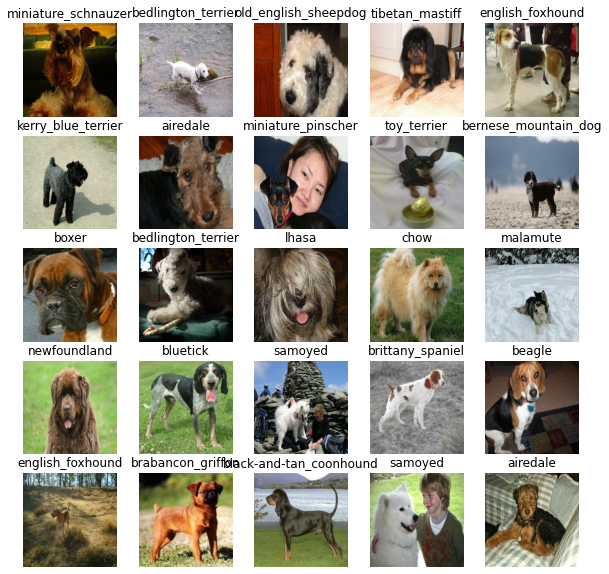

In [ ]:
show_25_images(train_images,train_labels)

 * **Building a model**
 
 we have to define :
 1. input shape of image( in form of tensor)
 2. ouput shape of image label (in from of tensor)
 3. URL of model to use

In [ ]:
# set input shape 
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] # batch,height,width,color channel

# set output shape
OUTPUT_SHAPE=len(unique_labels)

# URL of model
MODEL_URL="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"


* **make a function to create model**

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):

  """using tensoflow keras create a model"""

  model=tf.keras.Sequential([ 
                             hub.KerasLayer(model_url),# first layer
                             tf.keras.layers.Dense(units=output_shape,activation="softmax")# second layer
                            ])
  
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  
  model.build(input_shape)

  return model




In [ ]:
model=create_model(INPUT_SHAPE,OUTPUT_SHAPE,MODEL_URL)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3,660,505
Trainable params: 120,240
Non-trainable params: 3,540,265
_________________________________________________________________


* **make callbacks**
during training callbacks can executed as it can be long process.

  purpose:
1. progress status
2. terminate from long process.

**TensorBoard Callback**

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

In [ ]:
import os

In [ ]:
# create a function to bulid a tensorboard callback

def create_tensorboard_callback():
  # crete log directoy
  logdir=os.path.join('/content/drive/MyDrive/Dog Vision/data/logs',
                      datetime.datetime.now().strftime("%Y%M5D--%H%M%S")
                      )
  
  return tf.keras.callbacks.TensorBoard(logdir)

* create a early stop callback to prevent overfitting.

In [ ]:
# make a early stopping callbak

Early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## **Training a model**

* only for subset of a dataset

In [ ]:
# make a function to train model

def train_model():
  """
   train a given model into trained version
  """

  # create a model
  model=create_model()

  # create callback
  tensorboard=create_tensorboard_callback()

  # fit the data and callbacks into model
  model.fit(x=train_data,
            epochs=100,
            callbacks=[tensorboard,Early_stopping],
            validation_data=val_data,
            validation_freq=1)

  return model

In [ ]:
model=train_model()

Epoch 1/100
25/25 [==============================] - 253s 10s/step - loss: 4.6395 - accuracy: 0.0950 - val_loss: 3.3483 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 5s 182ms/step - loss: 1.5667 - accuracy: 0.6850 - val_loss: 2.0820 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 5s 195ms/step - loss: 0.5117 - accuracy: 0.9438 - val_loss: 1.6331 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 5s 195ms/step - loss: 0.2281 - accuracy: 0.9937 - val_loss: 1.5001 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 5s 181ms/step - loss: 0.1328 - accuracy: 0.9975 - val_loss: 1.4327 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 5s 181ms/step - loss: 0.0924 - accuracy: 0.9987 - val_loss: 1.3901 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 5s 183ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 1.3698 - val_accuracy: 0.6500

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/data/logs/

## **make predection for model**

In [ ]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 5s 152ms/step


array([[2.9500171e-03, 7.2503241e-04, 2.2410305e-04, ..., 6.3831464e-04,
        3.1065533e-04, 1.3684957e-04],
       [3.4188869e-04, 1.7148128e-03, 3.4228684e-03, ..., 1.5059157e-04,
        7.1323332e-03, 8.9660934e-06],
       [5.7411435e-06, 6.4628963e-05, 4.4163287e-05, ..., 6.2730331e-05,
        3.6931651e-06, 8.6045535e-03],
       ...,
       [2.1271560e-05, 1.2652375e-04, 6.0049646e-05, ..., 5.9262664e-05,
        6.4202453e-05, 9.3134346e-05],
       [1.2464044e-04, 3.9572437e-06, 5.5702662e-06, ..., 5.6155688e-05,
        1.0955462e-05, 8.3725731e-04],
       [1.7079531e-03, 1.5353710e-04, 2.5960387e-04, ..., 1.0471000e-02,
        2.0367906e-03, 9.1898156e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(predictions[0])

120

In [ ]:
max(predictions[0])

0.51792717

In [ ]:
predictions[0]

array([2.95001711e-03, 7.25032412e-04, 2.24103045e-04, 6.66442938e-05,
       2.79766135e-03, 8.67466850e-04, 2.58825850e-02, 9.97562078e-04,
       4.84329707e-04, 1.39333788e-04, 4.74558969e-04, 5.48367563e-04,
       1.49640793e-04, 2.50445184e-04, 1.24532744e-04, 6.66121137e-04,
       1.73872249e-05, 1.12167960e-02, 5.77304745e-05, 7.08510634e-05,
       1.49897195e-03, 2.19350890e-03, 1.95534478e-04, 3.73937219e-04,
       2.36415726e-05, 3.53699841e-04, 1.27406418e-02, 7.97387853e-04,
       7.28329469e-04, 6.73389470e-04, 9.79200006e-04, 1.07607758e-02,
       2.52695580e-04, 1.42429817e-05, 3.62207793e-05, 1.55162429e-02,
       3.02623259e-04, 7.94801512e-04, 5.57699095e-05, 1.10452340e-04,
       3.00769898e-04, 4.66631864e-05, 6.24106906e-05, 1.04485592e-03,
       2.32681763e-04, 5.35000931e-04, 1.42650388e-04, 4.70544735e-04,
       1.46782739e-04, 7.10756239e-03, 4.03490121e-05, 1.03703089e-04,
       5.09395823e-03, 8.17042965e-05, 6.29434508e-05, 9.94708826e-05,
      

In [ ]:
sum(predictions[0])

0.9999999652736733

In [ ]:
index=162

print(predictions[index])
print("Max value :",max(predictions[index]))
print("Sum :",np.sum(predictions[index]))
idx=np.argmax(predictions[index])
print("Max index:",idx)
print("Breed:",unique_labels[idx])

[2.05738252e-05 2.06181867e-04 3.78540659e-04 2.74823979e-03
 6.96461721e-05 1.21661760e-05 8.19456982e-05 4.20941833e-05
 1.28027773e-03 2.23337105e-04 9.09288287e-01 1.90446459e-04
 1.36564040e-05 1.45205273e-03 3.97722091e-04 5.93819947e-04
 6.97334326e-05 2.80885899e-04 4.77202993e-04 1.09678258e-04
 3.60843819e-06 4.71185303e-05 8.67440322e-05 8.25543902e-05
 2.96471844e-04 5.74901824e-05 1.15142495e-04 9.36033975e-05
 3.69668152e-04 7.11321718e-06 1.14299080e-04 6.53174211e-05
 2.69108103e-04 4.30345171e-05 3.90996400e-04 1.44598700e-04
 1.75983718e-04 1.12460315e-04 3.33730277e-05 9.00975196e-04
 1.04421852e-04 2.86824506e-05 2.21122391e-04 2.89246218e-05
 3.15485013e-05 1.14288734e-04 7.63707521e-06 9.28806403e-05
 4.26823135e-05 6.90022076e-04 1.99306087e-05 1.03671788e-04
 2.73558486e-04 9.01594874e-04 2.69991113e-04 2.66113231e-04
 6.05477137e-04 1.41411822e-03 7.56879963e-05 4.33141924e-03
 3.77337041e-04 1.36985429e-04 1.58073381e-04 2.61761124e-05
 1.30442821e-03 3.873957

In [ ]:
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

* image with predection in visulisation

In [ ]:
# turn prediction probablities into thier respective label

def get_pred_label(predection_probablities):
  """Turn prediction into label"""

  return unique_labels[np.argmax(predection_probablities)]


In [ ]:
get_pred_label(predictions[12])

'silky_terrier'

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

* ***here our validation data is in batch format we will unbatch to retrive images and label tensor for predection***

In [ ]:
# create a function to unbatch

def get_unbatched(data):
  """Take batch data and return unbatched images and labels."""
  images,labels=next(data.as_numpy_iterator())

  return images,labels


In [ ]:
valid_images,valid_labels=get_unbatched(val_data)

In [ ]:
valid_images

array([[[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],

        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],

        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],

        ...,

        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.9427856 ]

In [ ]:
valid_labels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
valid_images[0],valid_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(valid_labels[10])

'yorkshire_terrier'

In [ ]:

get_pred_label(predictions[10])

'miniature_schnauzer'

In [ ]:
valid_images[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

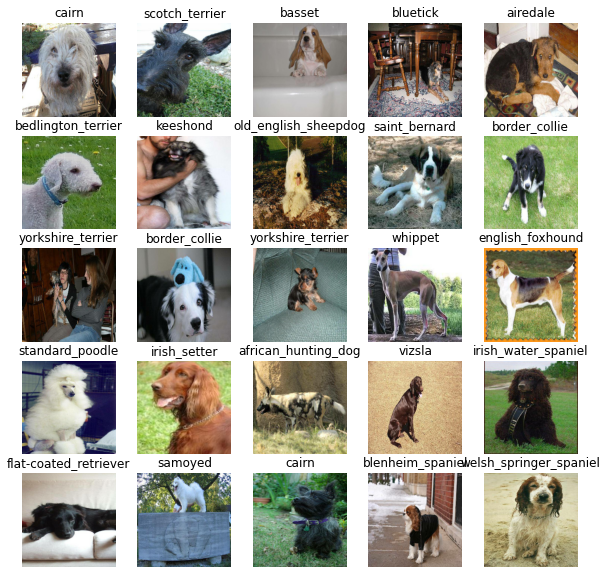

In [ ]:
show_25_images(valid_images,valid_labels)

In [ ]:
import matplotlib.pyplot as plt

def show_predictions(images,labels,predictions):
  """
    display a plot of  images with lables of predicted and actual.
  """
  plt.figure(figsize=(15,15))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    pred_prob=predictions[i]
    pred_label=get_pred_label(pred_prob)

    plt.imshow(images[i]) # image
    plt.title("\n\n actual:"+unique_labels[labels[i].argmax()]+"\n predicted:"+pred_label) # label

    plt.axis("off")
 


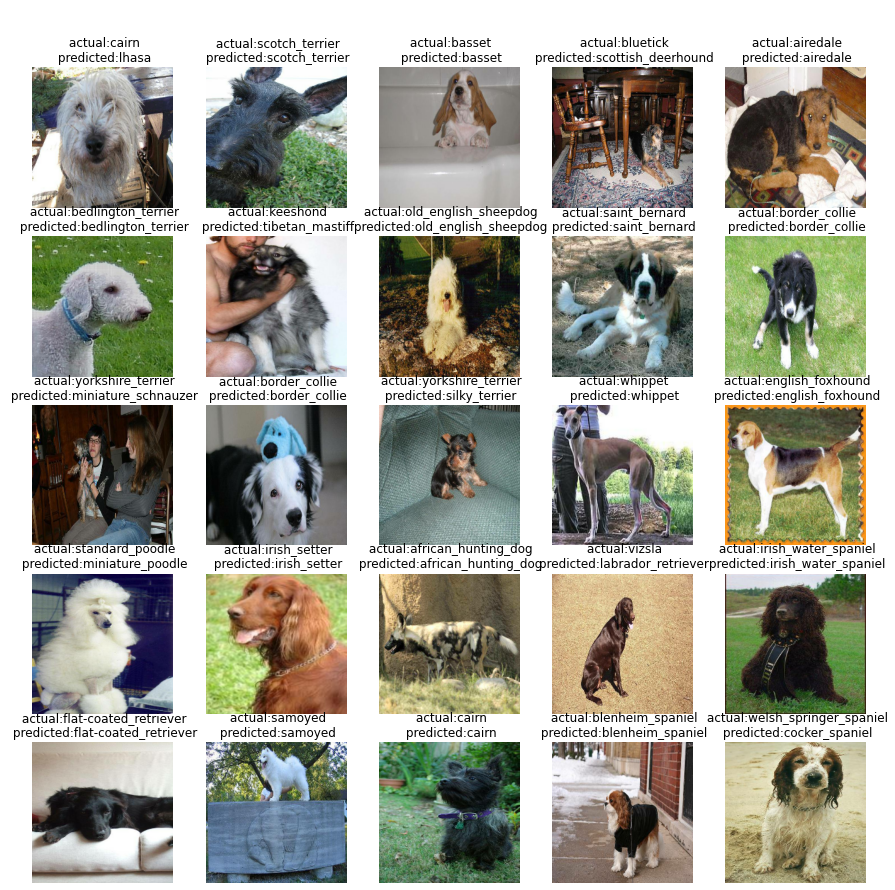

In [ ]:
show_predictions(valid_images,valid_labels,predictions)

In [ ]:
predictions[0]

array([2.95001711e-03, 7.25032412e-04, 2.24103045e-04, 6.66442938e-05,
       2.79766135e-03, 8.67466850e-04, 2.58825850e-02, 9.97562078e-04,
       4.84329707e-04, 1.39333788e-04, 4.74558969e-04, 5.48367563e-04,
       1.49640793e-04, 2.50445184e-04, 1.24532744e-04, 6.66121137e-04,
       1.73872249e-05, 1.12167960e-02, 5.77304745e-05, 7.08510634e-05,
       1.49897195e-03, 2.19350890e-03, 1.95534478e-04, 3.73937219e-04,
       2.36415726e-05, 3.53699841e-04, 1.27406418e-02, 7.97387853e-04,
       7.28329469e-04, 6.73389470e-04, 9.79200006e-04, 1.07607758e-02,
       2.52695580e-04, 1.42429817e-05, 3.62207793e-05, 1.55162429e-02,
       3.02623259e-04, 7.94801512e-04, 5.57699095e-05, 1.10452340e-04,
       3.00769898e-04, 4.66631864e-05, 6.24106906e-05, 1.04485592e-03,
       2.32681763e-04, 5.35000931e-04, 1.42650388e-04, 4.70544735e-04,
       1.46782739e-04, 7.10756239e-03, 4.03490121e-05, 1.03703089e-04,
       5.09395823e-03, 8.17042965e-05, 6.29434508e-05, 9.94708826e-05,
      

In [ ]:
np.argmax(predictions[0])

70

In [ ]:
np.argmin(predictions[0])

33

In [ ]:
idx = (predictions).argsort()[:1]

In [ ]:
idx[0][:10]

array([ 33,  16,  56,  24,  66,  71, 105,  34, 104,  85])

In [ ]:
idx = (-predictions).argsort()[:1]

In [ ]:
idx

array([[ 70, 103, 109,   6,  65,  77,  35,  76,  73,  26,  59,  17,  31,
        116,  83,  79,  68,  49, 100,  81,  52, 102, 106,  97,   0,  57,
          4,  21,  20,  43,   7,  30, 110,  98,  82,   5,  27,  37,  28,
          1,  74,  87,  62,  29,  15, 117, 113,  11,  94,  45,  93,   8,
         10,  60,  47,  95,  96, 108,  91,  23, 111,  25, 114,  88, 118,
         36,  40,  64, 115,  32,  13, 107,  44,   2,  75,  22,  89,  12,
         48,  46,  80,   9, 119,  58,  78,  14,  72,  39, 101,  51,  55,
         99,  86,  90,  67,  53,  61,  63,  19,   3, 112,  54,  42,  84,
         18,  92,  38,  69,  41,  50,  85, 104,  34, 105,  71,  66,  24,
         56,  16,  33]])

In [ ]:
top10=idx[0][:10]

In [ ]:
top10

array([ 70, 103, 109,   6,  65,  77,  35,  76,  73,  26])

In [ ]:
predictions[0]

array([2.95001711e-03, 7.25032412e-04, 2.24103045e-04, 6.66442938e-05,
       2.79766135e-03, 8.67466850e-04, 2.58825850e-02, 9.97562078e-04,
       4.84329707e-04, 1.39333788e-04, 4.74558969e-04, 5.48367563e-04,
       1.49640793e-04, 2.50445184e-04, 1.24532744e-04, 6.66121137e-04,
       1.73872249e-05, 1.12167960e-02, 5.77304745e-05, 7.08510634e-05,
       1.49897195e-03, 2.19350890e-03, 1.95534478e-04, 3.73937219e-04,
       2.36415726e-05, 3.53699841e-04, 1.27406418e-02, 7.97387853e-04,
       7.28329469e-04, 6.73389470e-04, 9.79200006e-04, 1.07607758e-02,
       2.52695580e-04, 1.42429817e-05, 3.62207793e-05, 1.55162429e-02,
       3.02623259e-04, 7.94801512e-04, 5.57699095e-05, 1.10452340e-04,
       3.00769898e-04, 4.66631864e-05, 6.24106906e-05, 1.04485592e-03,
       2.32681763e-04, 5.35000931e-04, 1.42650388e-04, 4.70544735e-04,
       1.46782739e-04, 7.10756239e-03, 4.03490121e-05, 1.03703089e-04,
       5.09395823e-03, 8.17042965e-05, 6.29434508e-05, 9.94708826e-05,
      

In [ ]:
top10_predictions=predictions[0][top10]

In [ ]:
top10_predictions

array([0.51792717, 0.11324848, 0.09800252, 0.02588258, 0.02110577,
       0.02024754, 0.01551624, 0.01546834, 0.01388577, 0.01274064],
      dtype=float32)

In [ ]:
top10_predictions[top10]

array([0.51792717, 0.11324848, 0.09800252, 0.02588258, 0.02110577,
       0.02024754, 0.01551624, 0.01546834, 0.01388577, 0.01274064],
      dtype=float32)

In [ ]:
def plot_prediction_confidence(predictions,n):
  """
  plot a bar graph with of predection confidence of different labels.
  """
  idx = (-predictions).argsort()[n:n+1]
  top_index=idx[0][:5]
  top_predictions=predictions[0][top_index]
  top_labels=unique_labels[top_index]
  print(top_labels)
  print(top_predictions)

  plt.barh(top_labels,top_predictions*100)
  return max(top_predictions)





['flat-coated_retriever' 'golden_retriever' 'tibetan_mastiff'
 'gordon_setter' 'collie']
[2.3268176e-04 7.1075624e-03 4.0369626e-04 4.0349012e-05 1.4242982e-05]


0.0071075624

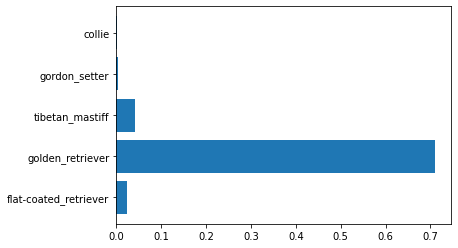

In [ ]:
plot_prediction_confidence(predictions,20)

In [ ]:
def prediction_checker(images,labels,predictions,i):
  """
  actual label and predicted label with endorsing prediction confidence.
  """
  value=round(plot_prediction_confidence(predictions,i)*100,2)
  confidence=str(value)
  pred_prob=predictions[i]
  pred_label=get_pred_label(pred_prob)
  if unique_labels[labels[i].argmax()]==pred_label:
    color="green"
  else:
    color="red" 
  plt.imshow(images[i]) # image
  plt.title("\n\n actual:"+unique_labels[labels[i].argmax()]+"\n predicted:"+pred_label+"\nconfidence="+confidence+"%",color=color) # label

  plt.axis("off")



['flat-coated_retriever' 'golden_retriever' 'tibetan_mastiff'
 'gordon_setter' 'collie']
[2.3268176e-04 7.1075624e-03 4.0369626e-04 4.0349012e-05 1.4242982e-05]


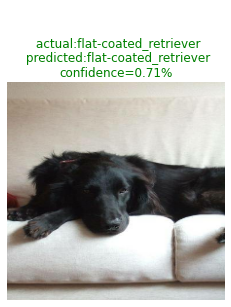

In [ ]:
prediction_checker(valid_images,valid_labels,predictions,20)

## **SAVE YOUR MODEL**

In [ ]:
filepath=os.path.join('/content/drive/MyDrive/Dog Vision/data/model')

In [ ]:
filepath

'/content/drive/MyDrive/Dog Vision/data/model'

In [ ]:
import pickle
pickle.dump(model,open(filepath,"wb"))

INFO:tensorflow:Assets written to: ram://c7b0778c-2a37-41d7-bd46-443304e2b10b/assets


INFO:tensorflow:Assets written to: ram://c7b0778c-2a37-41d7-bd46-443304e2b10b/assets


In [ ]:
model.save(filepath+".h5")

* load a model

In [ ]:
model=pickle.load(open(filepath,"rb"))